In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | goundam
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | dakar
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | tailai
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | ushtobe
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | rudbar
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | oga
Processing Record 18 of Set 1 | wanning
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | mys shmidta
City not found. Skipping...
Processing Recor

Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | homer
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | imeni poliny osipenko
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | ntcheu
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | gazli
Processing Record 50 of Set 4 | kloulklubed
Processing Record 1 of Set 5 | oranjemund
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | pyay
Processing Record 4 of Set 5 | andenes
Processing Record 5 of Set 5 | pithoragarh
Processing Record 6 of Set 5 | pontes e lacerda
Processing Record 7 of Set 5 | marsh harbour
Processing Record 8 of Set 5 | dongsheng
Processing Record 9 of Set 5 | kosgi
City not found. Skipping...
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 5 | hervey bay
Processing Record 12 of Set 5 | dj

Processing Record 26 of Set 8 | victoria
Processing Record 27 of Set 8 | agnibilekrou
Processing Record 28 of Set 8 | dobson
Processing Record 29 of Set 8 | mogadishu
Processing Record 30 of Set 8 | khandyga
Processing Record 31 of Set 8 | sorland
Processing Record 32 of Set 8 | rundu
Processing Record 33 of Set 8 | tocopilla
Processing Record 34 of Set 8 | rio gallegos
Processing Record 35 of Set 8 | tutoia
Processing Record 36 of Set 8 | najran
Processing Record 37 of Set 8 | pandan niog
Processing Record 38 of Set 8 | liberty
Processing Record 39 of Set 8 | hauterive
Processing Record 40 of Set 8 | talawdi
City not found. Skipping...
Processing Record 41 of Set 8 | chara
Processing Record 42 of Set 8 | moranbah
Processing Record 43 of Set 8 | sinnamary
Processing Record 44 of Set 8 | vikulovo
Processing Record 45 of Set 8 | nara
Processing Record 46 of Set 8 | cabinda
Processing Record 47 of Set 8 | jumla
Processing Record 48 of Set 8 | lompoc
Processing Record 49 of Set 8 | troitsk

Processing Record 18 of Set 12 | teahupoo
Processing Record 19 of Set 12 | feldkirchen an der donau
Processing Record 20 of Set 12 | winona
Processing Record 21 of Set 12 | tuatapere
Processing Record 22 of Set 12 | denpasar
Processing Record 23 of Set 12 | atascadero
Processing Record 24 of Set 12 | kuche
City not found. Skipping...
Processing Record 25 of Set 12 | hondo
Processing Record 26 of Set 12 | urumqi
Processing Record 27 of Set 12 | kudahuvadhoo
Processing Record 28 of Set 12 | muroto
Processing Record 29 of Set 12 | husavik
Processing Record 30 of Set 12 | birin
Processing Record 31 of Set 12 | alto piquiri
Processing Record 32 of Set 12 | dovbysh
Processing Record 33 of Set 12 | greenville
Processing Record 34 of Set 12 | talas
Processing Record 35 of Set 12 | allapalli
Processing Record 36 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 37 of Set 12 | karratha
Processing Record 38 of Set 12 | kupang
Processing Record 39 of Set 12 | sinop
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,65.30,66,36,16.82,AU,2022-04-06 01:37:15
1,Ushuaia,-54.8000,-68.3000,37.06,87,40,27.63,AR,2022-04-06 01:34:39
2,Goundam,16.4145,-3.6708,85.86,10,30,9.69,ML,2022-04-06 01:39:36
3,Bredasdorp,-34.5322,20.0403,58.03,75,14,14.00,ZA,2022-04-06 01:39:37
4,Dakar,14.6937,-17.4441,65.28,84,0,18.70,SN,2022-04-06 01:39:37
5,Nikolskoye,59.7035,30.7861,26.80,78,100,11.10,RU,2022-04-06 01:39:37
6,Tailai,46.3833,123.4000,36.88,15,2,15.86,CN,2022-04-06 01:39:38
7,Butaritari,3.0707,172.7902,81.57,80,100,17.13,KI,2022-04-06 01:39:38
8,Ushtobe,45.2514,77.9838,64.58,33,8,5.12,KZ,2022-04-06 01:39:38
9,Yellowknife,62.4560,-114.3525,29.28,64,75,9.22,CA,2022-04-06 01:39:39


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Lincoln,AU,2022-04-06 01:37:15,-34.7333,135.8667,65.30,66,36,16.82
1,Ushuaia,AR,2022-04-06 01:34:39,-54.8000,-68.3000,37.06,87,40,27.63
2,Goundam,ML,2022-04-06 01:39:36,16.4145,-3.6708,85.86,10,30,9.69
3,Bredasdorp,ZA,2022-04-06 01:39:37,-34.5322,20.0403,58.03,75,14,14.00
4,Dakar,SN,2022-04-06 01:39:37,14.6937,-17.4441,65.28,84,0,18.70
5,Nikolskoye,RU,2022-04-06 01:39:37,59.7035,30.7861,26.80,78,100,11.10
6,Tailai,CN,2022-04-06 01:39:38,46.3833,123.4000,36.88,15,2,15.86
7,Butaritari,KI,2022-04-06 01:39:38,3.0707,172.7902,81.57,80,100,17.13
8,Ushtobe,KZ,2022-04-06 01:39:38,45.2514,77.9838,64.58,33,8,5.12
9,Yellowknife,CA,2022-04-06 01:39:39,62.4560,-114.3525,29.28,64,75,9.22


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

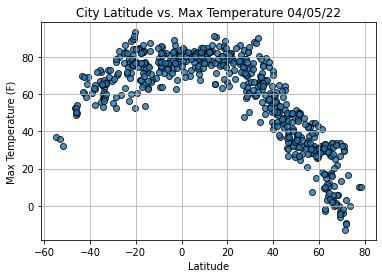

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

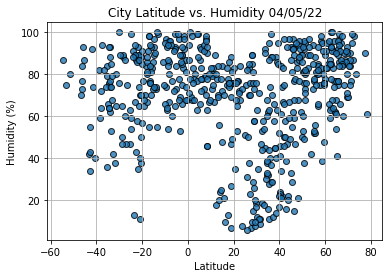

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

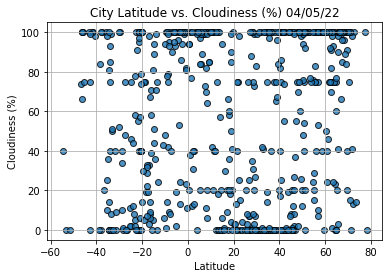

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

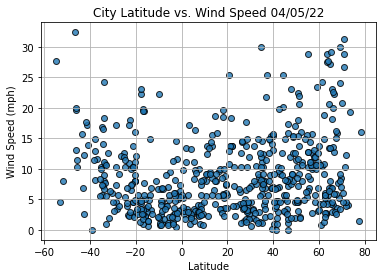

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2022-04-06 01:39:40
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    77.83
Humidity                       87
Cloudiness                     23
Wind Speed                    6.4
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
565     True
566    False
567     True
568     True
569    False
Name: Lat, Length: 570, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Goundam,ML,2022-04-06 01:39:36,16.4145,-3.6708,85.86,10,30,9.69
4,Dakar,SN,2022-04-06 01:39:37,14.6937,-17.4441,65.28,84,0,18.70
5,Nikolskoye,RU,2022-04-06 01:39:37,59.7035,30.7861,26.80,78,100,11.10
6,Tailai,CN,2022-04-06 01:39:38,46.3833,123.4000,36.88,15,2,15.86
7,Butaritari,KI,2022-04-06 01:39:38,3.0707,172.7902,81.57,80,100,17.13


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


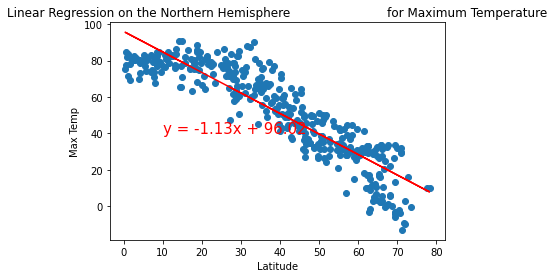

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

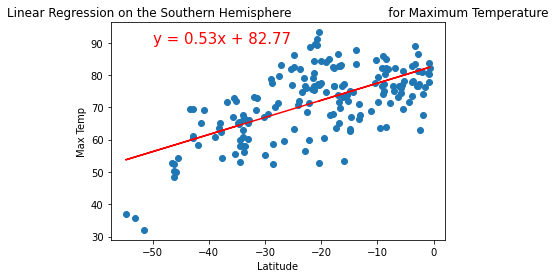

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


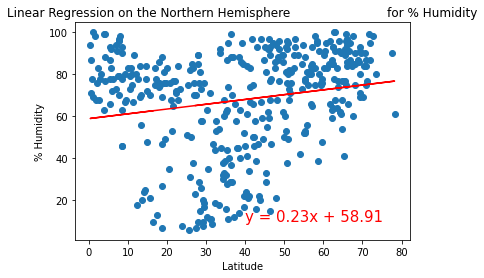

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

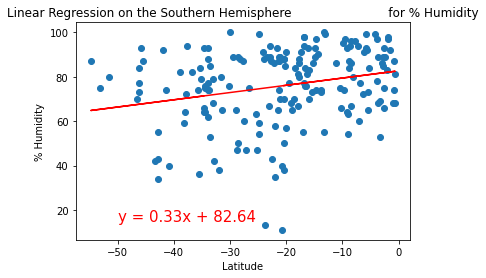

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

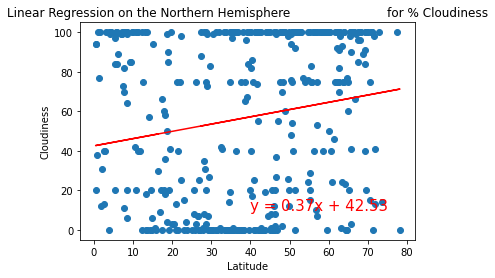

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(40,10))

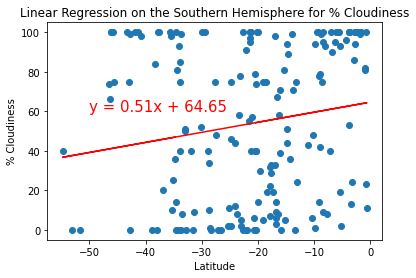

In [44]:

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))


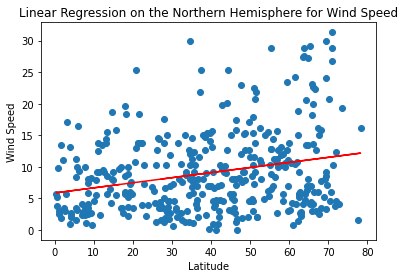

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

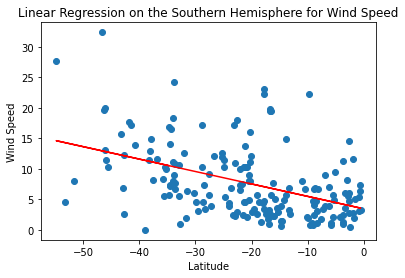

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))